# Check Base Algorithms

This notebook checks if the base community detection algorithms are working correctly on the Karate Club graph.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

In [4]:
import igraph as ig
import matplotlib.pyplot as plt
from fastconsensus.algorithms import get_algorithm

In [7]:


# Load the Karate Club graph
g = ig.Graph.Famous("Zachary")
print(f"Loaded Karate Club graph with {g.vcount()} nodes and {g.ecount()} edges")

Loaded Karate Club graph with 34 nodes and 78 edges


In [8]:
def plot_communities(g, partition, title):
    color_list = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']
    node_colors = [color_list[c % len(color_list)] for c in partition.values()]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ig.plot(
        g,
        target=ax,
        vertex_color=node_colors,
        vertex_size=20,
        edge_width=0.5,
        layout=g.layout_fruchterman_reingold()
    )
    plt.title(title)
    plt.axis('off')
    plt.show()

Louvain algorithm detected 4 communities


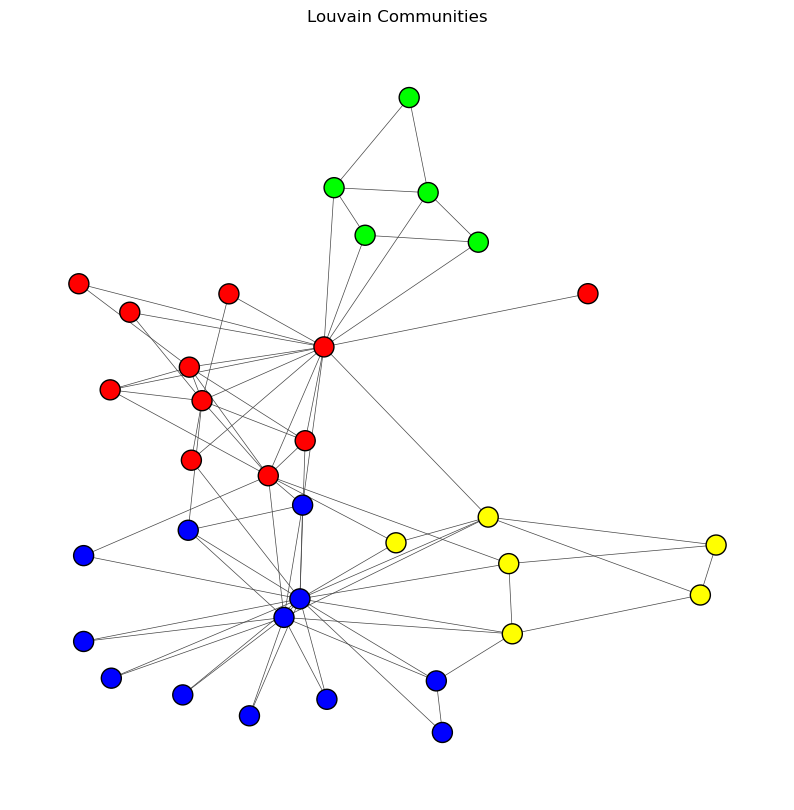

In [14]:
# Test Louvain algorithm
louvain_alg = get_algorithm('louvain')
louvain_partition = louvain_alg.detect_communities(g)
print(f"Louvain algorithm detected {len(set(louvain_partition.values()))} communities")
plot_communities(g, louvain_partition, "Louvain Communities")

Label Propagation algorithm detected 2 communities


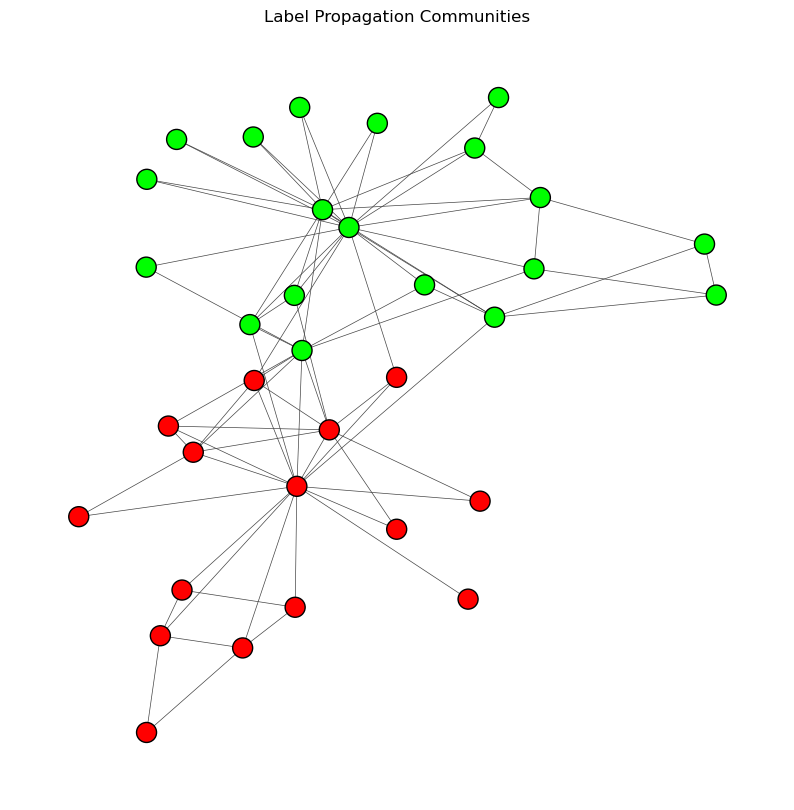

In [13]:
# Test Label Propagation algorithm
lpa_alg = get_algorithm('label_propagation')
lpa_partition = lpa_alg.detect_communities(g)
print(f"Label Propagation algorithm detected {len(set(lpa_partition.values()))} communities")
plot_communities(g, lpa_partition, "Label Propagation Communities")

InfoMap algorithm detected 3 communities


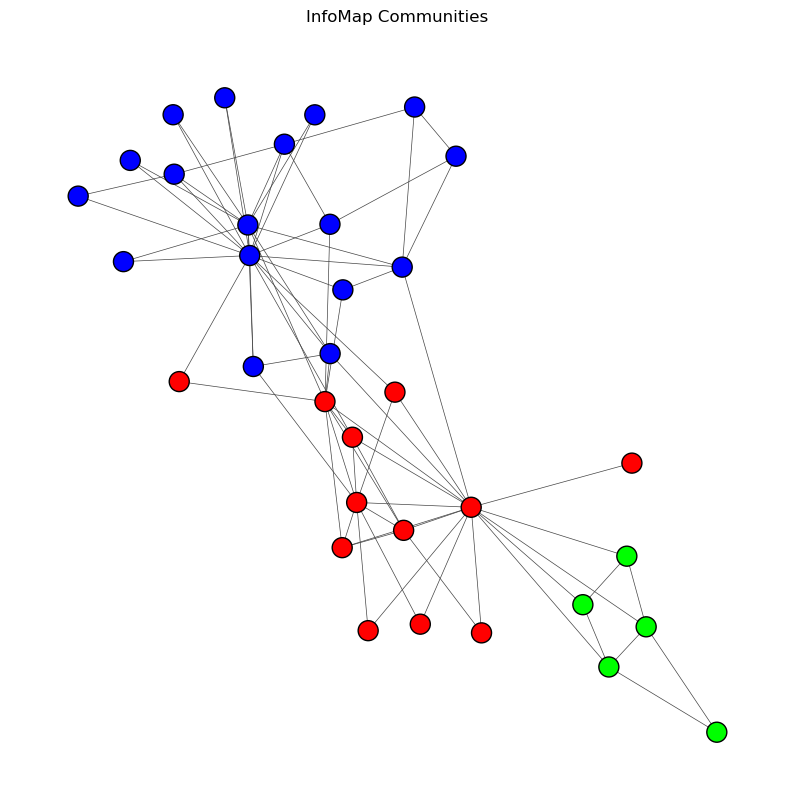

In [11]:
# Test InfoMap algorithm (if available)
try:
    infomap_alg = get_algorithm('infomap')
    infomap_partition = infomap_alg.detect_communities(g)
    print(f"InfoMap algorithm detected {len(set(infomap_partition.values()))} communities")
    plot_communities(g, infomap_partition, "InfoMap Communities")
except KeyError:
    print("InfoMap algorithm is not implemented yet.")